In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

a_df = pd.read_csv('simulated_machine_data.csv')
a_df.head()

,machine_id,Coolant_level,Electrical_supply_voltage,Electrical_supply_current,Compressed_air_flow_rate,Compressed_air_pressure,Compressed_air_temperature,Through_spindle_coolant_pressure,Through_spindle_coolant_flow,Flood_coolant_flow,Coolant_temperature,Coolant_Acidity,Spindle_speed,Servo_motor_vibration,Servo_motor_torque,Coolant_dilution,Ballscrew_strain,Process_sound_monitoring,Spindle_vibration,Estimated_status
0,d8b67d7f-2c3e-46e4-94cc-cdaa67023b56,187,238.7,142.6,44.0,4.4,51.4,771.8,446.9,189.3,61.7,7.2,14986.5,19.8,11.0,4.8,46.7,21.6,6.8,1
1,2591cdaa-d61b-4f90-a08c-e69741ff34fa,58,139.8,26.1,66.0,0.5,41.4,39.0,644.6,214.1,37.0,4.6,9607.2,33.5,146.5,150.2,99.0,50.4,34.9,1
2,832fd357-3ca1-4c21-869b-18f18ea88f67,267,257.7,120.1,99.9,29.0,89.3,700.5,411.0,347.9,16.0,10.1,36063.3,48.2,5.5,181.4,2.5,102.2,42.6,2
3,004c77eb-e04a-4b87-bf00-67d941bf5436,132,341.7,142.8,22.7,5.6,1.5,515.0,176.6,278.3,27.6,0.2,4326.5,1.7,125.3,190.6,92.5,78.9,5.9,1
4,08e4b5f7-b048-45f5-a2fb-e134ad02bd23,108,211.0,73.4,5.1,4.6,27.5,1431.2,94.7,55.6,87.8,5.4,18552.7,5.0,90.0,87.0,62.1,115.3,19.4,1


In [2]:
a_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   machine_id                        2182 non-null   object 
 1   Coolant_level                     2182 non-null   int64  
 2   Electrical_supply_voltage         2182 non-null   float64
 3   Electrical_supply_current         2182 non-null   float64
 4   Compressed_air_flow_rate          2182 non-null   float64
 5   Compressed_air_pressure           2182 non-null   float64
 6   Compressed_air_temperature        2182 non-null   float64
 7   Through_spindle_coolant_pressure  2182 non-null   float64
 8   Through_spindle_coolant_flow      2182 non-null   float64
 9   Flood_coolant_flow                2182 non-null   float64
 10  Coolant_temperature               2182 non-null   float64
 11  Coolant_Acidity                   2182 non-null   float64
 12  Spindl

In [3]:
# min-max normalisation
a_df["Coolant_level"] = (a_df["Coolant_level"] - a_df["Coolant_level"].min()) / (a_df["Coolant_level"].max() -a_df["Coolant_level"].min())
a_df["Electrical_supply_voltage"] = (a_df["Electrical_supply_voltage"] - a_df["Electrical_supply_voltage"].min()) / (a_df["Electrical_supply_voltage"].max() -a_df["Electrical_supply_voltage"].min())
a_df["Electrical_supply_current"] = (a_df["Electrical_supply_current"] - a_df["Electrical_supply_current"].min()) / (a_df["Electrical_supply_current"].max() -a_df["Electrical_supply_current"].min())
a_df["Compressed_air_flow_rate"] = (a_df["Compressed_air_flow_rate"] - a_df["Compressed_air_flow_rate"].min()) / (a_df["Compressed_air_flow_rate"].max() -a_df["Compressed_air_flow_rate"].min())
a_df["Compressed_air_pressure"] = (a_df["Compressed_air_pressure"] - a_df["Compressed_air_pressure"].min()) / (a_df["Compressed_air_pressure"].max() -a_df["Compressed_air_pressure"].min())
a_df["Compressed_air_temperature"] = (a_df["Compressed_air_temperature"] - a_df["Compressed_air_temperature"].min()) / (a_df["Compressed_air_flow_rate"].max() -a_df["Compressed_air_temperature"].min())
a_df["Through_spindle_coolant_pressure"] = (a_df["Through_spindle_coolant_pressure"] - a_df["Through_spindle_coolant_pressure"].min()) / (a_df["Through_spindle_coolant_pressure"].max() -a_df["Through_spindle_coolant_pressure"].min())
a_df["Through_spindle_coolant_flow"] = (a_df["Through_spindle_coolant_flow"] - a_df["Through_spindle_coolant_flow"].min()) / (a_df["Through_spindle_coolant_flow"].max() -a_df["Through_spindle_coolant_flow"].min())
a_df["Flood_coolant_flow"] = (a_df["Flood_coolant_flow"] - a_df["Flood_coolant_flow"].min()) / (a_df["Flood_coolant_flow"].max() -a_df["Flood_coolant_flow"].min())
a_df["Coolant_temperature"] = (a_df["Coolant_temperature"] - a_df["Coolant_temperature"].min()) / (a_df["Coolant_temperature"].max() -a_df["Coolant_temperature"].min())
a_df["Coolant_Acidity"] = (a_df["Coolant_Acidity"] - a_df["Coolant_Acidity"].min()) / (a_df["Coolant_Acidity"].max() -a_df["Coolant_Acidity"].min())
a_df["Spindle_speed"] = (a_df["Spindle_speed"] - a_df["Spindle_speed"].min()) / (a_df["Spindle_speed"].max() -a_df["Spindle_speed"].min())
a_df["Servo_motor_vibration"] = (a_df["Servo_motor_vibration"] - a_df["Servo_motor_vibration"].min()) / (a_df["Servo_motor_vibration"].max() -a_df["Servo_motor_vibration"].min())
a_df["Servo_motor_torque"] = (a_df["Servo_motor_torque"] - a_df["Servo_motor_torque"].min()) / (a_df["Servo_motor_torque"].max() -a_df["Servo_motor_torque"].min())
a_df["Coolant_dilution"] = (a_df["Coolant_dilution"] - a_df["Coolant_dilution"].min()) / (a_df["Coolant_dilution"].max() -a_df["Coolant_dilution"].min())
a_df["Ballscrew_strain"] = (a_df["Ballscrew_strain"] - a_df["Ballscrew_strain"].min()) / (a_df["Ballscrew_strain"].max() -a_df["Ballscrew_strain"].min())
a_df["Process_sound_monitoring"] = (a_df["Process_sound_monitoring"] - a_df["Process_sound_monitoring"].min()) / (a_df["Process_sound_monitoring"].max() -a_df["Process_sound_monitoring"].min())
a_df["Spindle_vibration"] = (a_df["Spindle_vibration"] - a_df["Spindle_vibration"].min()) / (a_df["Spindle_vibration"].max() -a_df["Spindle_vibration"].min())

print("Min/max normalised")
print(a_df)
print("\n")


Min/max normalised
                                machine_id  Coolant_level  \
0     d8b67d7f-2c3e-46e4-94cc-cdaa67023b56       0.624161   
1     2591cdaa-d61b-4f90-a08c-e69741ff34fa       0.191275   
2     832fd357-3ca1-4c21-869b-18f18ea88f67       0.892617   
3     004c77eb-e04a-4b87-bf00-67d941bf5436       0.439597   
4     08e4b5f7-b048-45f5-a2fb-e134ad02bd23       0.359060   
...                                    ...            ...   
2177  c37e117d-3e1e-4817-a283-4d4be092121e       0.614094   
2178  7a8f5471-73fe-41b4-b129-ba5ddfa09b9d       0.651007   
2179  1ba350e6-0b7d-4b77-bb38-ec2deeae01a2       0.617450   
2180  fe914e20-9376-427d-85f3-3708a2f1da47       0.436242   
2181  52c25f20-cb0e-4b34-afb6-c32e6be91c84       0.627517   

      Electrical_supply_voltage  Electrical_supply_current  \
0                      0.554487                   0.893977   
1                      0.158253                   0.163112   
2                      0.630609                   0.752823   


In [4]:
a_df

,machine_id,Coolant_level,Electrical_supply_voltage,Electrical_supply_current,Compressed_air_flow_rate,Compressed_air_pressure,Compressed_air_temperature,Through_spindle_coolant_pressure,Through_spindle_coolant_flow,Flood_coolant_flow,Coolant_temperature,Coolant_Acidity,Spindle_speed,Servo_motor_vibration,Servo_motor_torque,Coolant_dilution,Ballscrew_strain,Process_sound_monitoring,Spindle_vibration,Estimated_status
0,d8b67d7f-2c3e-46e4-94cc-cdaa67023b56,0.624161,0.554487,0.893977,0.288500,0.082495,51.4,0.514371,0.638666,0.270011,0.616617,0.514286,0.332497,0.383673,0.050277,0.023035,0.462083,0.119577,0.118367,1
1,2591cdaa-d61b-4f90-a08c-e69741ff34fa,0.191275,0.158253,0.163112,0.436449,0.004024,41.4,0.025675,0.921580,0.305460,0.369369,0.328571,0.212840,0.663265,0.731523,0.751127,0.990900,0.279755,0.691837,1
2,832fd357-3ca1-4c21-869b-18f18ea88f67,0.892617,0.630609,0.752823,0.664425,0.577465,89.3,0.466822,0.587293,0.496712,0.159159,0.721429,0.801330,0.963265,0.022624,0.907361,0.015167,0.567853,0.848980,2
3,004c77eb-e04a-4b87-bf00-67d941bf5436,0.439597,0.967147,0.895232,0.145259,0.106640,1.5,0.343114,0.251860,0.397227,0.275275,0.014286,0.095376,0.014286,0.624937,0.953430,0.925177,0.438265,0.100000,1
4,08e4b5f7-b048-45f5-a2fb-e134ad02bd23,0.359060,0.443510,0.459849,0.026900,0.086519,27.5,0.954118,0.134659,0.078902,0.877878,0.385714,0.411824,0.081633,0.447461,0.434652,0.617796,0.640712,0.375510,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,c37e117d-3e1e-4817-a283-4d4be092121e,0.614094,0.452724,0.148055,0.299933,0.144869,55.4,0.500033,0.007012,0.401658,0.384384,0.557143,0.848792,0.234694,0.041730,0.302954,0.137513,0.197442,0.265306,0
2178,7a8f5471-73fe-41b4-b129-ba5ddfa09b9d,0.651007,0.574119,0.098494,0.078682,0.040241,35.1,0.525108,0.213080,0.550314,0.062062,0.600000,0.146521,0.100000,0.381599,0.191788,0.206269,0.232481,0.212245,0
2179,1ba350e6-0b7d-4b77-bb38-ec2deeae01a2,0.617450,0.457933,0.029486,0.115669,0.136821,23.8,0.303034,0.209931,0.308176,0.542543,0.600000,0.214986,0.261224,0.212167,0.298448,0.093023,0.339266,0.220408,0
2180,fe914e20-9376-427d-85f3-3708a2f1da47,0.436242,0.410256,0.200753,0.328850,0.187123,55.0,0.246415,0.041070,0.351201,0.392392,0.535714,0.153179,0.004082,0.222725,0.453180,0.096057,0.418242,0.087755,0


,Coolant_level,Electrical_supply_voltage,Electrical_supply_current,Compressed_air_flow_rate,Compressed_air_pressure,Compressed_air_temperature,Through_spindle_coolant_pressure,Through_spindle_coolant_flow,Flood_coolant_flow,Coolant_temperature,Coolant_Acidity,Spindle_speed,Servo_motor_vibration,Servo_motor_torque,Coolant_dilution,Ballscrew_strain,Process_sound_monitoring,Spindle_vibration,Estimated_status
Coolant_level,1.000000,0.028336,0.102489,0.134965,0.136668,0.018589,0.058906,0.045132,0.049915,0.055023,-0.007065,0.010899,0.139310,0.083050,0.083997,0.146645,0.116589,0.121499,0.188779
Electrical_supply_voltage,0.028336,1.000000,-0.018785,0.015495,0.010836,0.005572,-0.004765,-0.011056,-0.014503,0.051270,0.039839,-0.010297,-0.016526,0.038378,-0.006283,-0.040954,-0.016998,0.014318,-0.012870
Electrical_supply_current,0.102489,-0.018785,1.000000,0.382369,0.373054,0.081526,0.237586,0.226205,0.169785,0.245848,0.003694,0.087759,0.381799,0.291509,0.304249,0.332452,0.307790,0.328463,0.609898
Compressed_air_flow_rate,0.134965,0.015495,0.382369,1.000000,0.424276,0.128026,0.218306,0.176220,0.145589,0.241626,-0.028510,0.086159,0.356638,0.326515,0.304081,0.374551,0.329263,0.398527,0.611156
Compressed_air_pressure,0.136668,0.010836,0.373054,0.424276,1.000000,0.127130,0.215153,0.201901,0.183720,0.217616,-0.003202,0.083934,0.421955,0.346356,0.332259,0.389628,0.347156,0.432063,0.650764
Compressed_air_temperature,0.018589,0.005572,0.081526,0.128026,0.127130,1.000000,0.079327,0.050097,0.068242,0.087446,-0.015019,0.017025,0.112244,0.101175,0.076359,0.118464,0.078459,0.111256,0.195877
Through_spindle_coolant_pressure,0.058906,-0.004765,0.237586,0.218306,0.215153,0.079327,1.000000,0.117233,0.097691,0.126419,-0.015659,0.051534,0.211848,0.170021,0.187049,0.234185,0.210340,0.232950,0.391780
Through_spindle_coolant_flow,0.045132,-0.011056,0.226205,0.176220,0.201901,0.050097,0.117233,1.000000,0.116871,0.114257,0.007277,0.030275,0.173548,0.153211,0.152838,0.202730,0.168057,0.184288,0.333817
Flood_coolant_flow,0.049915,-0.014503,0.169785,0.145589,0.183720,0.068242,0.097691,0.116871,1.000000,0.143044,0.005492,0.041097,0.171210,0.131983,0.147187,0.159959,0.156713,0.168741,0.308218
Coolant_temperature,0.055023,0.051270,0.245848,0.241626,0.217616,0.087446,0.126419,0.114257,0.143044,1.000000,0.035961,0.004964,0.222876,0.207413,0.185143,0.233532,0.209937,0.221085,0.399674


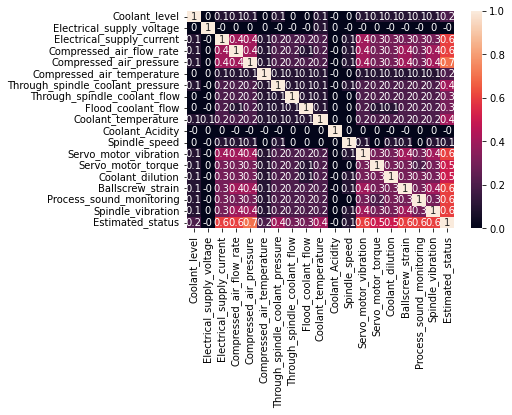

In [5]:
# create a correlation matrix rounding to one decimal point 
correlation_matrix = a_df.corr().round(1)
# print a correlation heat map 
sns.heatmap(data=correlation_matrix, annot=True)
corr = a_df.corr() #(stackoverflow 2022) 
corr.style.background_gradient(cmap='coolwarm')


In [6]:
a_df.drop(columns='machine_id',inplace=True)



In [7]:
## save the Y values
a_df_target = a_df.Estimated_status

In [8]:
## save the Y values
a_df_target = a_df.Estimated_status
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(a_df.drop(columns='Estimated_status'), 
                                                    a_df['Estimated_status'], test_size = 0.2,
                                                    random_state = 1234,                         ## make the random to be sure
                                                    stratify = a_df['Estimated_status'])                ## stratify samples by Y value

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1745, 18)
(437, 18)
(1745,)
(437,)


In [9]:
# fit a decision tree to the training data
from sklearn.tree import DecisionTreeClassifier as DTC
tree_model = DTC()
tree_model_fit = tree_model.fit(X_train, Y_train)

# get the accuracy score of the test data
tree_model_fit.score(X_test, Y_test)

0.8237986270022883

In [10]:
#import the confusion matrix

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    
    

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
        # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

<AxesSubplot:xlabel='Predicted label', ylabel='True label'>

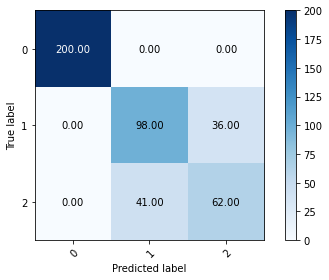

In [11]:
# predict the test data
predicted = tree_model_fit.predict(X_test)

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0", "1","2"])

In [12]:
##optimise the hyperparameters

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy


Best parameters set found on the training set:
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 5}




              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.73      0.78      0.75       134
           2       0.68      0.63      0.66       103

    accuracy                           0.84       437
   macro avg       0.81      0.80      0.80       437
weighted avg       0.84      0.84      0.84       437



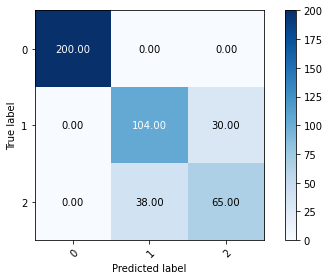

In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# fit model with new hyperparameters
tree_model = DTC(criterion='gini', max_depth = 7, max_features = None, min_samples_split = 5) 
## the f1_macro has a better performance
tree_model_fit = tree_model.fit(X_train, Y_train)

predicted = tree_model_fit.predict(X_test)
plot_confusion_matrix(Y_test, predicted, classes=["0", "1" ,"2"])
print(classification_report(Y_test, predicted))

<AxesSubplot:>

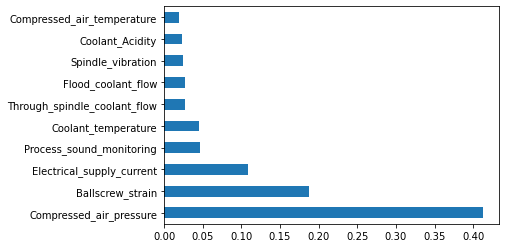

In [14]:
## plot the feature importance

from sklearn.metrics import plot_confusion_matrix,roc_auc_score,roc_curve

feature_importance=pd.Series(tree_model.feature_importances_,index=X_test.columns)
# order by the importance
import_top10=feature_importance.sort_values(ascending=False)[:10]
# features which perform more than 0.10 in the graph are of vital importance to Y
import_top10.plot.barh()

In [15]:
## Random Forrest

from sklearn import ensemble
from sklearn import metrics

RF_class = ensemble.RandomForestClassifier(n_estimators=200, random_state=1234)
RF_class.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=1234)

In [16]:
# predict the test data
RF_class_fit = RF_class.fit(X_train, Y_train)
predicted = RF_class_fit.predict(X_test)


print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       0.91      0.91      0.91       134
           2       0.88      0.88      0.88       103

    accuracy                           0.95       437
   macro avg       0.93      0.93      0.93       437
weighted avg       0.95      0.95      0.95       437

